# Statistical Analysis

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [40]:
df = pd.read_csv("./noGUI/results/combined_results_2021-05-21T16-44-05.csv")
# pd.set_option('display.max_rows', df.shape[0]+1)


In [23]:
df

,sim_number,start_pos,start_angle,nbRefPointBots,nbMeasurerBots,globalMethodRPB,mb_exp_method,rpb_exp_method,rpb_sel_method,first_loop,measuredTiles,surface,pathLength,sim_duration,totalPathLengthRPB,nbMovesRPB,averageMoveLengthRPB,maxLengthMoveRPB,roomName
0,1,"(692, 809)",0.0,6,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,84,230,102,45.156999,92.810838,10,9.281084,23.868576,../../../UWBSLAM18.pickle
1,2,"(692, 809)",0.0,7,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,134,230,157,63.561399,134.955652,13,10.381204,23.868576,../../../UWBSLAM18.pickle
2,3,"(692, 809)",0.0,8,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,136,230,208,107.302000,136.826163,15,9.121744,22.282790,../../../UWBSLAM18.pickle
3,4,"(692, 809)",0.0,9,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,142,230,238,102.178000,168.655654,16,10.540978,31.288427,../../../UWBSLAM18.pickle
4,5,"(692, 809)",0.0,10,1,progressive,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findLeastUsefulBotsDjikstra,RPB,218,230,373,766.088378,373.362065,29,12.874554,32.037680,../../../UWBSLAM18.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,111,"(342, 259)",0.0,6,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,215,230,287,49.012634,362.586279,42,8.633007,20.189102,../../../UWBSLAM18.pickle
456,112,"(342, 259)",0.0,7,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,189,230,255,63.304955,326.367484,46,7.094945,19.813708,../../../UWBSLAM18.pickle
457,113,"(342, 259)",0.0,8,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,230,230,333,94.348250,592.511755,69,8.587127,21.512656,../../../UWBSLAM18.pickle
458,114,"(342, 259)",0.0,9,1,reset,findTargetV3,findClosestClusterToOrigin and findClosestClus...,findFurthestBotDjikstra,RPB,228,230,327,98.897002,552.142276,66,8.365792,15.607381,../../../UWBSLAM18.pickle


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sim_number            460 non-null    int64  
 1   start_pos             460 non-null    object 
 2   start_angle           460 non-null    float64
 3   nbRefPointBots        460 non-null    int64  
 4   nbMeasurerBots        460 non-null    int64  
 5   globalMethodRPB       460 non-null    object 
 6   mb_exp_method         460 non-null    object 
 7   rpb_exp_method        460 non-null    object 
 8   rpb_sel_method        460 non-null    object 
 9   first_loop            460 non-null    object 
 10  measuredTiles         460 non-null    int64  
 11  surface               460 non-null    int64  
 12  pathLength            460 non-null    int64  
 13  sim_duration          460 non-null    float64
 14  totalPathLengthRPB    460 non-null    float64
 15  nbMovesRPB            4

In [41]:
progSeries = df[(df["globalMethodRPB"] == "progressive") & (df["rpb_sel_method"] == "findFurthestBotDjikstra")]
resetSeries = df[(df["globalMethodRPB"] == "reset") & (df["rpb_sel_method"] == "findLeastUsefulBotsDjikstra")]

# progSeries = df[(df["globalMethodRPB"] == "progressive")]
# resetSeries = df[(df["globalMethodRPB"] == "reset")]


In [45]:
nbRefPointBots = []
progMeasuredTiles = []
resetMeasuredTiles = []
progTotalPathLengthRPB = [] 
resetTotalPathLengthRPB = []
for i in progSeries["nbRefPointBots"].unique():
    nbRefPointBots.append(i)
    progMeasuredTiles.append(progSeries[progSeries["nbRefPointBots"] == i]["measuredTiles"].mean())
    resetMeasuredTiles.append(resetSeries[resetSeries["nbRefPointBots"] == i]["measuredTiles"].mean())
    progTotalPathLengthRPB.append(progSeries[progSeries["nbRefPointBots"] == i]["totalPathLengthRPB"].mean())
    resetTotalPathLengthRPB.append(resetSeries[resetSeries["nbRefPointBots"] == i]["totalPathLengthRPB"].mean())


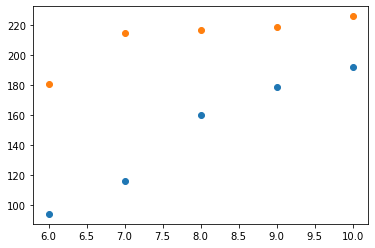

In [36]:
plt.scatter(nbRefPointBots, progMeasuredTiles)
plt.scatter(nbRefPointBots, resetMeasuredTiles)
plt.show()

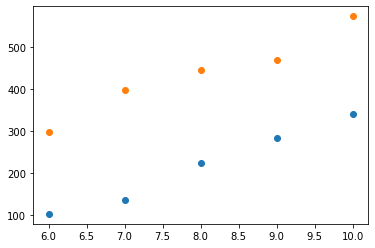

In [37]:
plt.scatter(nbRefPointBots, progTotalPathLengthRPB)
plt.scatter(nbRefPointBots, resetTotalPathLengthRPB)
plt.show()

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=nbRefPointBots, y=progMeasuredTiles,
                    mode='markers',
                    name='progressive method'))
fig.add_trace(go.Scatter(x=nbRefPointBots, y=resetMeasuredTiles,
                    mode='markers',
                    name='reset method'))
                    
fig.add_hline(y=df["surface"].unique()[0], annotation_text='total number of tiles')

fig.update_layout(
    title="Number of tiles visited with different methods",
    yaxis_title="number of tiles visited",
    legend_title="Methods",
)      
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=nbRefPointBots, y=progTotalPathLengthRPB,
                    mode='markers',
                    name='progressive method'))
fig.add_trace(go.Scatter(x=nbRefPointBots, y=resetTotalPathLengthRPB,
                    mode='markers',
                    name='reset method'))
                    
fig.update_layout(
    title="Total distance travelled by RPB with different methods",
    yaxis_title="Total Distance",
    legend_title="Methods",
)      
fig.show()